In [1]:
# imports
!pip install tf-models-official
import pandas as pd
import tensorflow as tf

2024-03-12 14:17:29.594438: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 14:17:29.594505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 14:17:29.596149: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# confirm to see if notebook is using/has GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
trainData = pd.read_csv('twitter_training.csv')
valData = pd.read_csv('twitter_validation.csv')

In [4]:
# check to see Dataframe
trainData.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
# check to see Dataframe
valData.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
# Dataset size
print(trainData.shape)
print(valData.shape)

(74681, 4)
(999, 4)


In [7]:
# Rename Dataset columns
trainData.rename(columns={"Borderlands": "Entity", "Positive": "Sentiment",
                     "im getting on borderlands and i will murder you all ,": "Text"},
                 inplace=True)

valData.rename(columns={"Facebook": "Entity", "Irrelevant": "Sentiment",
                        "I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣": "Text"},
               inplace=True)

In [8]:
# see changes on trainData
trainData.head()

,2401,Entity,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
# train data on valData
valData.head()

,3364,Entity,Sentiment,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [10]:
# find any duplicates in datasets
print(trainData.duplicated().sum())
print(valData.duplicated().sum())

2700
0


In [11]:
# get rid of duplicates in trainData
trainData.drop_duplicates(inplace=True)

In [12]:
# see if it worked
trainData.duplicated().sum()

0

In [13]:
# see unique values in trainData and valData
print(trainData.nunique())
print("******************")
print(valData.nunique())

2401         12447
Entity          32
Sentiment        4
Text         69490
dtype: int64
******************
3364         999
Entity        32
Sentiment      4
Text         998
dtype: int64


In [14]:
# concat TEXT and ENTITY values to form one value under TEXT
trainData['Text'] = trainData['Entity'].str.cat(trainData['Text'], sep=" ")
valData['Text'] = valData['Entity'].str.cat(valData['Text'], sep=" ")

In [15]:
# see the changes
trainData.head()

,2401,Entity,Sentiment,Text
0,2401,Borderlands,Positive,Borderlands I am coming to the borders and I w...
1,2401,Borderlands,Positive,Borderlands im getting on borderlands and i wi...
2,2401,Borderlands,Positive,Borderlands im coming on borderlands and i wil...
3,2401,Borderlands,Positive,Borderlands im getting on borderlands 2 and i ...
4,2401,Borderlands,Positive,Borderlands im getting into borderlands and i ...


In [16]:
valData.head()

,3364,Entity,Sentiment,Text
0,352,Amazon,Neutral,Amazon BBC News - Amazon boss Jeff Bezos rejec...
1,8312,Microsoft,Negative,Microsoft @Microsoft Why do I pay for WORD whe...
2,4371,CS-GO,Negative,CS-GO CSGO matchmaking is so full of closet ha...
3,4433,Google,Neutral,Google Now the President is slapping Americans...
4,6273,FIFA,Negative,FIFA Hi @EAHelp I’ve had Madeleine McCann in m...


In [17]:
# drop irrelevant columns
trainData.drop(columns=['2401', 'Entity'], inplace=True)
valData.drop(columns=['3364', 'Entity'], inplace=True)

In [18]:
# see changes
trainData.head()

,Sentiment,Text
0,Positive,Borderlands I am coming to the borders and I w...
1,Positive,Borderlands im getting on borderlands and i wi...
2,Positive,Borderlands im coming on borderlands and i wil...
3,Positive,Borderlands im getting on borderlands 2 and i ...
4,Positive,Borderlands im getting into borderlands and i ...


In [19]:
valData.head()

,Sentiment,Text
0,Neutral,Amazon BBC News - Amazon boss Jeff Bezos rejec...
1,Negative,Microsoft @Microsoft Why do I pay for WORD whe...
2,Negative,CS-GO CSGO matchmaking is so full of closet ha...
3,Neutral,Google Now the President is slapping Americans...
4,Negative,FIFA Hi @EAHelp I’ve had Madeleine McCann in m...


In [20]:
# encode our sentiments
trainData['Sentiment'].replace({'Positive': 1, 'Negative': 0, 'Neutral': 2, 'Irrelevant': 3}, inplace=True)
valData['Sentiment'].replace({'Positive': 1, 'Negative': 0, 'Neutral': 2, 'Irrelevant': 3}, inplace=True)

/tmp/ipykernel_1276/130197985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trainData['Sentiment'].replace({'Positive': 1, 'Negative': 0, 'Neutral': 2, 'Irrelevant': 3}, inplace=True)
/tmp/ipykernel_1276/130197985.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trainData['Sentiment'].repla

In [21]:
# see changes
trainData.head()

,Sentiment,Text
0,1,Borderlands I am coming to the borders and I w...
1,1,Borderlands im getting on borderlands and i wi...
2,1,Borderlands im coming on borderlands and i wil...
3,1,Borderlands im getting on borderlands 2 and i ...
4,1,Borderlands im getting into borderlands and i ...


In [22]:
valData.head()

,Sentiment,Text
0,2,Amazon BBC News - Amazon boss Jeff Bezos rejec...
1,0,Microsoft @Microsoft Why do I pay for WORD whe...
2,0,CS-GO CSGO matchmaking is so full of closet ha...
3,2,Google Now the President is slapping Americans...
4,0,FIFA Hi @EAHelp I’ve had Madeleine McCann in m...


In [23]:
# convert our data to numpy arrays
xData = trainData['Text'].to_numpy()
yData = trainData['Sentiment'].to_numpy()
xVal = valData['Text'].to_numpy()
yVal = valData['Sentiment'].to_numpy()

In [24]:
# imports
import math
num = math.ceil(0.8*71981)

# segment trainData into training and testing dataset
xTrain = xData[:num]
xTest = xData[num:]

yTrain = yData[:num]
yTest = yData[num:]

In [26]:
# perform one-hot encoding for our y values
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

# one-hot encoding
yTrain = lencoder.fit_transform(yTrain)
yTest = lencoder.fit_transform(yTest)
yVal = lencoder.fit_transform(yVal)

yTrain = tf.one_hot(yTrain, depth=len(lencoder.classes_))
yTest = tf.one_hot(yTest, depth=len(lencoder.classes_))
yVal = tf.one_hot(yVal, depth=len(lencoder.classes_))

In [27]:
# ensure every value is of type string
xTrain = xTrain.astype(str)
xTest = xTest.astype(str)
xVal = xVal.astype(str)

In [29]:
# Second phase

#imports
import tensorflow_hub as thub
#!pip install tensorflow_text
import tensorflow_text as ttext

In [30]:
# links to our pretrained models
bert_preprocessor_link = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
bert_link = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'

In [31]:
# teext sentiment model
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = thub.KerasLayer(bert_preprocessor_link, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = thub.KerasLayer(bert_link, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(4, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [32]:
# just to see if GPU is available for use
if tf.config.list_physical_devices('GPU'):
  print("GPU Available!")
else:
  print("GPU Not Available!")

GPU Available!


In [33]:
# create the model
model = build_classifier_model()

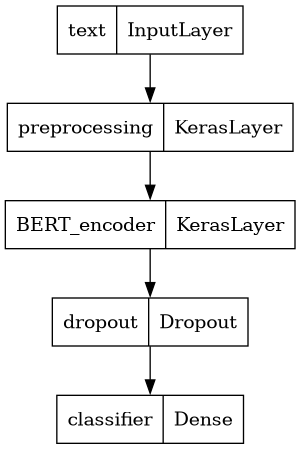

In [34]:
# summary diagram of our model
tf.keras.utils.plot_model(model)

In [35]:
from official.nlp import optimization

epoch_val = 8

steps_per_epoch = xTrain.size
num_train_steps = steps_per_epoch * epoch_val
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
custom_optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [36]:
# compile model
model.compile(optimizer=custom_optimizer, loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [37]:
# set training call-backs
termination_protocol = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

In [38]:
# train model
# decided to use the test dataset as our validation number
# because it has more data that can improve our models accuracy to non-training data
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=epoch_val, batch_size=30 ,shuffle=True,callbacks=[termination_protocol])

Epoch 1/8
1920/1920 [==============================] - 304s 153ms/step - loss: 1.4858 - accuracy: 0.2896 - val_loss: 1.2449 - val_accuracy: 0.4622
Epoch 2/8
1920/1920 [==============================] - 294s 153ms/step - loss: 1.2645 - accuracy: 0.4401 - val_loss: 1.0918 - val_accuracy: 0.5581
Epoch 3/8
1920/1920 [==============================] - 294s 153ms/step - loss: 1.1066 - accuracy: 0.5323 - val_loss: 1.0394 - val_accuracy: 0.5796
Epoch 4/8
1920/1920 [==============================] - 294s 153ms/step - loss: 1.0107 - accuracy: 0.5833 - val_loss: 1.0338 - val_accuracy: 0.5802
Epoch 5/8
1920/1920 [==============================] - 294s 153ms/step - loss: 0.9239 - accuracy: 0.6238 - val_loss: 1.0492 - val_accuracy: 0.5811
Epoch 6/8
1920/1920 [==============================] - 295s 154ms/step - loss: 0.8393 - accuracy: 0.6629 - val_loss: 1.0610 - val_accuracy: 0.5870
Epoch 7/8
1920/1920 [==============================] - 294s 153ms/step - loss: 0.7434 - accuracy: 0.7083 - val_loss: 1

In [53]:
# evaluate data on test dataset
model.evaluate(xVal, yVal)

32/32 [==============================] - 2s 76ms/step - loss: 0.5411 - accuracy: 0.8218


[0.5411162376403809, 0.8218218088150024]

In [45]:
# save model in two different types
model.save("senitment-model.keras")